### Technically Achievable Leakage Level Calculation

This code snippet calculates a technically achievable leakage level for each District Metered Area (DMA) as part of a larger project aimed at monitoring and managing water distribution systems. Determining a technically achievable level provides a baseline measure of leakage performance, representing the lowest leakage level practically attainable under ideal conditions. This level serves as an important performance marker, helping utilities identify realistic targets for leakage reduction and assess whether current levels are within acceptable bounds.

In this code, the calculate_technically_achievable function computes the technically achievable leakage level by analysing flow measurements (simulated with dummy data). It calculates a z-score threshold based on a given percentile of the z-score distribution, effectively filtering out extreme low values that may represent outliers or noise. This percentile threshold (set by default to the 5th percentile) provides a rigorous benchmark, allowing only values above a certain statistical threshold to be considered.

The function then calculates the minimum leakage value above this threshold, which is taken as the technically achievable level. This value is visually represented as a red dashed line on the leakage plot, allowing easy comparison between the achievable level and actual flow values. By doing so, this code aids in flagging flow readings that fall below achievable performance, thus supporting targeted maintenance and efficiency improvements.


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
leakage_data = pd.read_csv('DMA Leakage.csv')

technically_achievable:  1.96700001


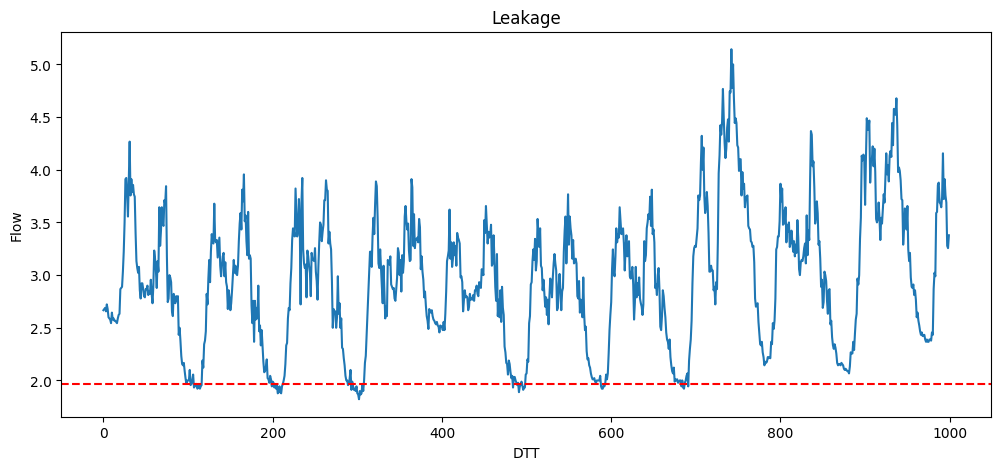

In [30]:
def calculate_technically_achievable(flow, threshold = 0.05):
    """
    Calculates the technically achievable value based on a list of flow values.
 
    Args:
        flow (list): A list of flow values.
        threshold (int): A proportion indicating the percentile for the z-scores threshold. 
        This value controls the strictness of the technically achievable value, where lower 
        values make it more exclusive.
 
    Returns:
        float: The technically achievable value.
    """
    try:
        # Calculate the mean and standard deviation
        mean = np.mean(flow)
        std = np.std(flow)
 
        # Calculate z-scores
        z_scores = (np.array(flow) - mean) / std
 
        # Find the optimised threshold
        thresh = np.percentile(z_scores, threshold * 100)
 
        # Find the minimum value based on the threshold
        min_value = np.min([e for e, z in zip(flow, z_scores) if e >= 0 and z > thresh])
 
        # Return the Technically achievable value
        return min_value if min_value is not None else 0
 
    except Exception as e:
        print(f'ERROR: {e}')
        return 0
    
technically_achievable = calculate_technically_achievable(leakage_data['Flow'])
print('technically_achievable: ', technically_achievable)

# Plotting the data
plt.figure(figsize=(12, 5))
plt.plot(leakage_data['Flow'])
plt.xlabel("DTT")
plt.ylabel("Flow")
plt.title("Leakage")

plt.axhline(y=technically_achievable, color="red", linestyle="--", label=f"y = {technically_achievable}")

plt.show()

In [31]:
print(len(leakage_data['Flow']))


1000
